# Team 109: Preprocessing and Exploratory Data Analysis
#### This notebook includes our initial exploratory data analysis (EDA) and preprocessing steps, aimed at thoroughly exploring the data and preparing a final, clean dataframe for the modeling phase.

# Libraries

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [341]:
tcga_mutations = pd.read_csv('data/TCGA_GBM_LGG_Mutations_all.csv')
tcga_mutations.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [342]:
tcga_mutations_df = tcga_mutations.copy()

In [343]:
tcga_mutations_df.shape

(862, 27)

In [344]:
tcga_mutations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [345]:
# Getting an statistical overview of the data
tcga_mutations_df.describe()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,862,862,862,862,862,862,862,862,862,862,...,862,862,862,862,862,862,862,862,862,862
unique,2,2,862,3,838,7,6,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,LGG,TCGA-LGG,TCGA-06-2557,Male,--,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
freq,499,499,1,499,5,360,766,448,508,642,...,815,821,824,833,834,834,835,839,839,840


In [346]:
tcga_mutations_df['Grade'].value_counts()

Grade
LGG    499
GBM    363
Name: count, dtype: int64

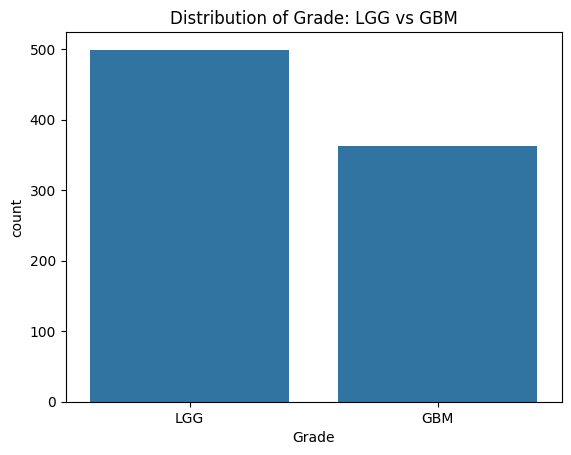

In [347]:
# Visualizing distribution of our dependent variable 'Grade'
  # There appears to be more patients with brain tumors classified as LGG than GBM
sns.countplot(x='Grade', data=tcga_mutations_df)

plt.title("Distribution of Grade: LGG vs GBM")
plt.show()

In [348]:
# Are there more males than females or vice versa?
tcga_mutations_df.groupby('Gender').size()

Gender
--          4
Female    359
Male      499
dtype: int64

In [349]:
tcga_mutations_df.isnull().sum() # No missing values yay!

Grade                0
Project              0
Case_ID              0
Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

In [350]:
missing_data = tcga_mutations_df['Age_at_diagnosis'].isna()
missing_rows = tcga_mutations_df[missing_data]

In [351]:
missing_rows

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA


In [352]:
tcga_mutations_df['Age_at_diagnosis'].unique()

array(['51 years 108 days', '38 years 261 days', '35 years 62 days',
       '32 years 283 days', '31 years 187 days', '33 years 78 days',
       '35 years 68 days', '44 years 239 days', '33 years 350 days',
       '87 years', '51 years 328 days', '54 years 95 days',
       '52 years 214 days', '47 years 123 days', '34 years 132 days',
       '40 years 192 days', '53 years 352 days', '41 years 70 days',
       '43 years 161 days', '37 years 159 days', '47 years 173 days',
       '31 years 8 days', '25 years 191 days', '66 years 305 days',
       '56 years 250 days', '35 years 362 days', '51 years 363 days',
       '37 years 32 days', '54 years 183 days', '32 years 76 days',
       '65 years 28 days', '43 years 131 days', '51 years 59 days',
       '43 years 221 days', '25 years 214 days', '45 years 24 days',
       '50 years 153 days', '27 years 166 days', '53 years 252 days',
       '46 years 144 days', '24 years 239 days', '--', '34 years 70 days',
       '29 years 198 days', '45 year

# After perfoming some EDA, it's time to preprocess the data and prepare it for the modeling phase. Some essential tasks that need to be addressed include...
1. **Convert Age_at_diagnosis variable to Numerical Format:** The Age_at_diagnosis contains values in string format. In order to feed this data into our ML models later on, we'll need to convert these values to a numerical format.

2. **Check for Missing Data:** After conducting our EDA, we confirmed there are "no missing values". However, we will check again for any missing data after step 1.

3. **Impute the data:** In the event that there are missing data during preprocessing, we will impute these missing values using either the median (for numerical columns) or the mode (for categorical columns). 

4. **Dimensionality Reduction via FAMD:** Using FAMD (Factor Analysis of Mixed Data) in order to perform feature selection. This method is effectively especially with our dataset due to it having both categorical and numerical variables.

5. **Convert the Dependent Variable, Grade, to Binary Format:** The dependent variable, **Grade**, needs to be converted to a binary format (e.g., 0 and 1).

6. **Address Multicollinearity:** We will address Multicollinearity between features using Cramer's V method to determine correlation between the categorical variables.

7. **Measure Relationship Between Continuous and Categorical Variables:** We will use Point Biserial to examine the relationship between the continuous and categorical variables.

## Convert values in Age_at_diagnosis to numerical values


In [357]:
tcga_mutations_df['Age_at_diagnosis'][0]

'51 years 108 days'

In [358]:
# import re

# def age_to_days(age_str):
#     str_match = re.match(r"(\d+)\s+years\s+(\d+)\s+days", age_str)

#     if str_match: 
#         age_years = int(str_match.group(1)) 
#         age_days = int(str_match.group(2))

#         total_days = age_years * 365 + age_days

#         return total_days

In [359]:
# tcga_mutations_df['Age_at_diagnosis'].map(age_to_days)

In [360]:
# Converts the values in the Age_at_diagnosis column to a numerical format 
# in which the number before the docimal represents the years 
# and the numbers after the decimal represent the fraction of the year based on the days
# For example, 1/4 of a year (365 days) is 91.25 or 91 days
def age_to_float(age_str):
    if pd.isna(age_str):
        return None
    
    str_match = re.match(r"(\d+)\s+years(?:\s+(\d+)\s+days)?", age_str)

    if str_match: 
        age_years = int(str_match.group(1)) 
        age_days = int(str_match.group(2)) if str_match.group(2) else 0

        fraction_of_year = age_days / 365 

        total_yrs = age_years + fraction_of_year

        return total_yrs

In [361]:
tcga_mutations_df['Age_at_diagnosis'] = tcga_mutations_df['Age_at_diagnosis'].map(age_to_float)

In [362]:
tcga_mutations_df

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51.295890,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38.715068,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35.169863,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32.775342,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31.512329,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77.890411,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85.178082,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77.487671,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63.331507,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


## Identify missing data


In [363]:
tcga_mutations_df.isna().sum() # Hmm 5 missing values now!

Grade                0
Project              0
Case_ID              0
Gender               0
Age_at_diagnosis     5
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

## Visualize the data to identify distribution of 'Age_at_diagnosis' in order to decide on method of imputation
* After taking a closer look at the data, we decided to impute the missing data in Age_at_diagnosis using the median. Even though the data isn't heavily skewed, the median is typically a better approach since it is less affected by outliers.

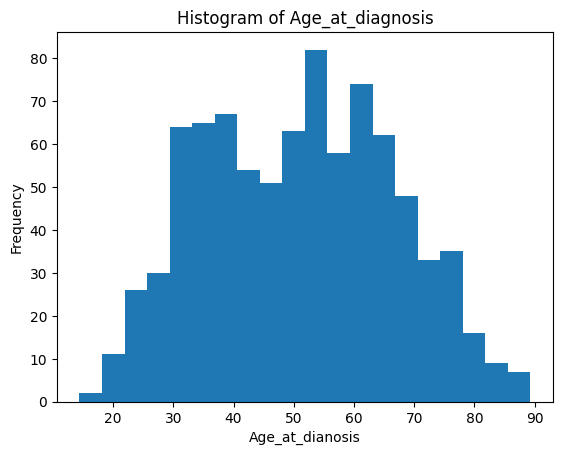

In [364]:
plt.hist(tcga_mutations_df['Age_at_diagnosis'], bins=20)
plt.title('Histogram of Age_at_diagnosis')
plt.xlabel('Age_at_dianosis')
plt.ylabel('Frequency')
plt.show()

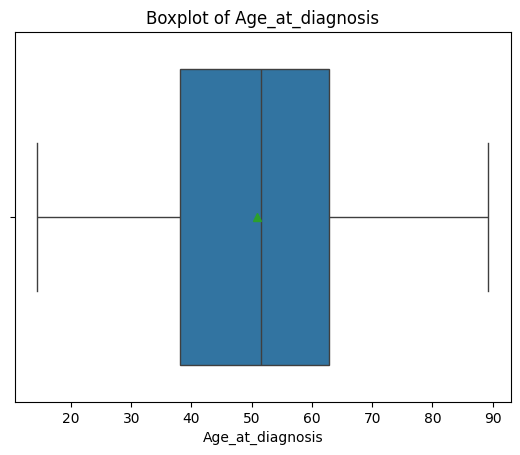

In [365]:
sns.boxplot(x=tcga_mutations_df['Age_at_diagnosis'],showmeans=True)
plt.title('Boxplot of Age_at_diagnosis')
plt.show()

In [366]:
tcga_mutations_df['Age_at_diagnosis'].describe()

count    857.000000
mean      50.924471
std       15.732797
min       14.421918
25%       38.021918
50%       51.550685
75%       62.769863
max       89.287671
Name: Age_at_diagnosis, dtype: float64

## Impute the missing data in Age_at_diagnosis, Gender and Race columns
* Using the Median for Age_at_diagnosis for actual NaN values
* Using the Mode for Gender and Race for '--' values (since they are categorical)
    * We think the '--' values were people who simply refused to enter their Gender

In [367]:
tcga_mutations_df['Gender'].value_counts()

Gender
Male      499
Female    359
--          4
Name: count, dtype: int64

In [368]:
tcga_mutations_df['Race'].value_counts()

Race
white                               766
black or african american            59
not reported                         18
asian                                14
--                                    4
american indian or alaska native      1
Name: count, dtype: int64

In [369]:
# Imputation for Age_at_diagnosis
tcga_mutations_df['Age_at_diagnosis'] = tcga_mutations_df['Age_at_diagnosis'].fillna(tcga_mutations_df['Age_at_diagnosis'].median())

In [370]:
# Imputation for Gender and Race - it turns out there isn't missing data but rather four instances of '--'
# Replace '--' values with None and then impute using the more frequent gender and race (assuming those instances are Male and White respectively)
tcga_mutations_df['Gender'] = tcga_mutations_df['Gender'].replace('--', None)
tcga_mutations_df['Gender'] = tcga_mutations_df['Gender'].fillna(tcga_mutations_df['Gender'].mode()[0])

tcga_mutations_df['Race'] = tcga_mutations_df['Race'].replace('--', None)
tcga_mutations_df['Race'] = tcga_mutations_df['Race'].fillna(tcga_mutations_df['Race'].mode()[0])

In [371]:
tcga_mutations_df['Gender'].value_counts()

Gender
Male      503
Female    359
Name: count, dtype: int64

In [372]:
tcga_mutations_df['Race'].value_counts()

Race
white                               770
black or african american            59
not reported                         18
asian                                14
american indian or alaska native      1
Name: count, dtype: int64

In [373]:
tcga_mutations_df.isna().sum() # No more missing data! 

Grade                0
Project              0
Case_ID              0
Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64

## Dimensionality Reduction via FAMD (Factor Analysis of Mixed Data)

In [31]:
tcga_mutations_df

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51.295890,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38.715068,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35.169863,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32.775342,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31.512329,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77.890411,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85.178082,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77.487671,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63.331507,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [32]:
# Removing the "Project", "Case_ID" and "Primary_Diagnosis" variable before running FAMD - as they don't really have no true meaning or relation to the "Grade" variable
tcga_mutations_df = tcga_mutations_df.drop(columns=["Project", "Case_ID", "Primary_Diagnosis"])

## FAMD - Before One-Hot Encoding

In [33]:
giloma_famd_pre_encoding = FAMD(n_components=10, random_state=17)
giloma_famd_pre_encoding = giloma_famd_pre_encoding.fit(tcga_mutations_df)

In [34]:
giloma_famd_pre_encoding.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,34.260,11.42%,11.42%
1,23.417,7.81%,19.23%
2,20.081,6.69%,25.92%
3,13.421,4.47%,30.39%
4,13.362,4.45%,34.85%
5,13.118,4.37%,39.22%
6,12.268,4.09%,43.31%
7,12.188,4.06%,47.37%
8,11.729,3.91%,51.28%


In [35]:
famd_col_contributions_pre = giloma_famd_pre_encoding.column_contributions_
print(famd_col_contributions_pre)

component                    0         1             2         3         4  \
variable                                                                     
Age_at_diagnosis  1.010720e-02  0.000555  5.634697e-04  0.000113  0.000290   
ATRX              7.618702e-03  0.012141  5.320759e-03  0.000816  0.000043   
BCOR              1.038876e-06  0.000529  7.185381e-03  0.000141  0.011301   
CIC               3.462494e-03  0.022375  8.571535e-10  0.000019  0.000356   
CSMD3             3.014120e-04  0.000240  1.295813e-02  0.006515  0.000853   
EGFR              6.772319e-03  0.000059  3.569410e-04  0.006000  0.000022   
FAT4              2.240482e-04  0.000892  9.749062e-03  0.012679  0.000946   
FUBP1             1.786537e-03  0.017878  5.893901e-04  0.000043  0.000859   
GRIN2A            1.383227e-03  0.000617  7.231277e-03  0.000150  0.000087   
Gender            1.967142e-04  0.000093  1.248897e-03  0.002725  0.009350   
Grade             1.901113e-02  0.000528  6.513490e-05  0.000004

In [36]:
famd_row_contributions_pre = giloma_famd_pre_encoding.row_contributions_
print(famd_row_contributions_pre)

component         0         1         2             3             4         5  \
0          0.000764  0.004253  0.000115  1.229176e-03  2.522239e-05  0.000201   
1          0.000871  0.001344  0.000673  2.044874e-05  1.744489e-07  0.000001   
2          0.001559  0.001674  0.000021  3.251008e-07  3.851727e-05  0.000033   
3          0.000557  0.000219  0.008353  1.859095e-02  9.107859e-03  0.001170   
4          0.001570  0.001677  0.000021  2.982533e-07  3.803687e-05  0.000033   
..              ...       ...       ...           ...           ...       ...   
857        0.001437  0.000011  0.000478  2.137208e-05  5.782983e-04  0.000526   
858        0.001017  0.000670  0.000137  2.942902e-04  3.024280e-05  0.001025   
859        0.000883  0.000597  0.000032  3.906403e-05  6.713238e-04  0.000903   
860        0.001450  0.000071  0.002084  1.290492e-03  1.355217e-04  0.000116   
861        0.000955  0.000014  0.001774  5.741864e-04  3.257391e-06  0.000493   

component         6        

In [37]:
# Getting the top 10 variables by contributions and converting the contributions in percentages for easier interpretability
# Columns contributions determine how much each variable contributes to each component

total_var_contributions_pre = famd_col_contributions_pre.sum(axis=1)

top_10_vars_pre_encoding = total_var_contributions_pre.sort_values(ascending=False).head(10) * 100

top_10_vars_pre_encoding = top_10_vars_pre_encoding.round(2).astype(str) + '%'

print(top_10_vars_pre_encoding)

variable
Race       16.4%
IDH2       5.42%
Gender     5.34%
PIK3R1     4.61%
PIK3CA      4.5%
BCOR       3.89%
SMARCA4     3.5%
MUC16       3.4%
TP53       3.33%
CSMD3      3.21%
dtype: object


## Now that we don't have anymore missing data, it is time to perform One-Hot Encoding on the Categorical Variables

In [374]:
tcga_mutations_df.columns

Index(['Grade', 'Gender', 'Age_at_diagnosis', 'Race', 'IDH1', 'TP53', 'ATRX',
       'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1',
       'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4',
       'PDGFRA'],
      dtype='object')

In [375]:
categorical_cols = ['Gender', 'Race', 'IDH1', 'TP53', 'ATRX', 'PTEN', 
                    'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 
                    'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
                    'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

# Ensures that Pandas treats them as actual categorical variables so that later on they contain binary values instead of boolean
for col in categorical_cols:
    tcga_mutations_df[col] = tcga_mutations_df[col].astype('category')
    # tcga_mutations_df[col] = pd.Categorical(tcga_mutations_df[col])

tcga_mutations_df_encoded = pd.get_dummies(tcga_mutations_df, columns=categorical_cols, drop_first=False) # setting to True could be an alternative to avoid multicollinearity

In [376]:
# Needed to convert encoded columns contain binary values instead of boolean values
for col in tcga_mutations_df_encoded.columns:
    if tcga_mutations_df_encoded[col].dtype == 'bool':
        tcga_mutations_df_encoded[col] = tcga_mutations_df_encoded[col].astype(int)

In [377]:
tcga_mutations_df_encoded

,Grade,Age_at_diagnosis,Gender_Female,Gender_Male,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_not reported,Race_white,IDH1_MUTATED,...,SMARCA4_MUTATED,SMARCA4_NOT_MUTATED,GRIN2A_MUTATED,GRIN2A_NOT_MUTATED,IDH2_MUTATED,IDH2_NOT_MUTATED,FAT4_MUTATED,FAT4_NOT_MUTATED,PDGFRA_MUTATED,PDGFRA_NOT_MUTATED
0,LGG,51.295890,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
1,LGG,38.715068,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
2,LGG,35.169863,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
3,LGG,32.775342,1,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,1
4,LGG,31.512329,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,77.890411,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
858,GBM,85.178082,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
859,GBM,77.487671,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
860,GBM,63.331507,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1


In [378]:
tcga_mutations_df_encoded.columns

Index(['Grade', 'Age_at_diagnosis', 'Gender_Female', 'Gender_Male',
       'Race_american indian or alaska native', 'Race_asian',
       'Race_black or african american', 'Race_not reported', 'Race_white',
       'IDH1_MUTATED', 'IDH1_NOT_MUTATED', 'TP53_MUTATED', 'TP53_NOT_MUTATED',
       'ATRX_MUTATED', 'ATRX_NOT_MUTATED', 'PTEN_MUTATED', 'PTEN_NOT_MUTATED',
       'EGFR_MUTATED', 'EGFR_NOT_MUTATED', 'CIC_MUTATED', 'CIC_NOT_MUTATED',
       'MUC16_MUTATED', 'MUC16_NOT_MUTATED', 'PIK3CA_MUTATED',
       'PIK3CA_NOT_MUTATED', 'NF1_MUTATED', 'NF1_NOT_MUTATED',
       'PIK3R1_MUTATED', 'PIK3R1_NOT_MUTATED', 'FUBP1_MUTATED',
       'FUBP1_NOT_MUTATED', 'RB1_MUTATED', 'RB1_NOT_MUTATED', 'NOTCH1_MUTATED',
       'NOTCH1_NOT_MUTATED', 'BCOR_MUTATED', 'BCOR_NOT_MUTATED',
       'CSMD3_MUTATED', 'CSMD3_NOT_MUTATED', 'SMARCA4_MUTATED',
       'SMARCA4_NOT_MUTATED', 'GRIN2A_MUTATED', 'GRIN2A_NOT_MUTATED',
       'IDH2_MUTATED', 'IDH2_NOT_MUTATED', 'FAT4_MUTATED', 'FAT4_NOT_MUTATED',
       'PDG

In [379]:
# tcga_mutations_df_encoded.info()

## FAMD - Post One-Hot Encoding

In [44]:
giloma_famd_post_encoding = FAMD(n_components=10, random_state=17)
giloma_famd_post_encoding = giloma_famd_post_encoding.fit(tcga_mutations_df_encoded)

In [45]:
giloma_famd_post_encoding.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,127.367,11.05%,11.05%
1,97.220,8.43%,19.48%
2,83.676,7.26%,26.74%
3,55.550,4.82%,31.55%
4,54.905,4.76%,36.32%
5,54.518,4.73%,41.04%
6,49.811,4.32%,45.36%
7,49.303,4.28%,49.64%
8,47.150,4.09%,53.73%


In [46]:
famd_col_contributions_post = giloma_famd_post_encoding.column_contributions_
print(famd_col_contributions_post)

component                                     0             1             2  \
variable                                                                      
Age_at_diagnosis                       0.002512  6.848579e-05  1.448723e-04   
ATRX_MUTATED                           0.002323  2.560496e-03  1.316447e-03   
ATRX_NOT_MUTATED                       0.002323  2.560496e-03  1.316447e-03   
BCOR_MUTATED                           0.000001  1.282114e-04  1.731525e-03   
BCOR_NOT_MUTATED                       0.000001  1.282114e-04  1.731525e-03   
CIC_MUTATED                            0.000729  5.717179e-03  4.134856e-07   
CIC_NOT_MUTATED                        0.000729  5.717179e-03  4.134856e-07   
CSMD3_MUTATED                          0.000113  4.127314e-05  3.137560e-03   
CSMD3_NOT_MUTATED                      0.000113  4.127314e-05  3.137560e-03   
EGFR_MUTATED                           0.002044  6.804368e-11  5.543634e-05   
EGFR_NOT_MUTATED                       0.002044  6.8

In [47]:
famd_row_contributions_post = giloma_famd_post_encoding.row_contributions_
print(famd_row_contributions_post)

component         0         1         2             3         4             5  \
0          0.000606  0.004496  0.000143  1.591501e-03  0.000050  4.412134e-05   
1          0.000701  0.001451  0.000669  3.694811e-06  0.000035  2.845520e-07   
2          0.001705  0.001488  0.000019  1.262570e-05  0.000107  1.455391e-05   
3          0.000482  0.000192  0.007824  1.930063e-02  0.002972  6.507147e-03   
4          0.001708  0.001488  0.000019  1.264167e-05  0.000106  1.451272e-05   
..              ...       ...       ...           ...       ...           ...   
857        0.001222  0.000024  0.000478  9.818243e-07  0.000493  8.487268e-04   
858        0.000715  0.000747  0.000136  7.190637e-06  0.000051  1.328902e-03   
859        0.000605  0.000650  0.000028  8.044613e-08  0.000393  1.229242e-03   
860        0.001263  0.000107  0.002135  2.015841e-03  0.000122  2.177633e-04   
861        0.000620  0.000009  0.001686  2.602141e-04  0.000030  4.853515e-04   

component         6        

In [48]:
# Getting the top 10 variables by contributions and converting the contributions in percentages for easier interpretability
# Columns contributions determine how much each variable contributes to each component

total_var_contributions_post = famd_col_contributions_post.sum(axis=1)

top_10_vars_post_encoding = total_var_contributions_post.sort_values(ascending=False).head(10) * 100

top_10_vars_post_encoding = top_10_vars_post_encoding.round(2).astype(str) + '%'

print(top_10_vars_post_encoding)

variable
Gender_Female          1.6%
Gender_Male            1.6%
IDH2_MUTATED          1.48%
IDH2_NOT_MUTATED      1.48%
PIK3CA_NOT_MUTATED    1.23%
PIK3CA_MUTATED        1.23%
PDGFRA_MUTATED        1.16%
PDGFRA_NOT_MUTATED    1.16%
PIK3R1_MUTATED        1.16%
PIK3R1_NOT_MUTATED    1.16%
dtype: object


In [ ]:
tcga_mutations_df_encoded['Grade'] = np.where(tcga_mutations_df_encoded['Grade'] == 'LGG', 0, 1)

In [381]:
tcga_mutations_df_encoded

,Grade,Age_at_diagnosis,Gender_Female,Gender_Male,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_not reported,Race_white,IDH1_MUTATED,...,SMARCA4_MUTATED,SMARCA4_NOT_MUTATED,GRIN2A_MUTATED,GRIN2A_NOT_MUTATED,IDH2_MUTATED,IDH2_NOT_MUTATED,FAT4_MUTATED,FAT4_NOT_MUTATED,PDGFRA_MUTATED,PDGFRA_NOT_MUTATED
0,0,51.295890,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
1,0,38.715068,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
2,0,35.169863,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
3,0,32.775342,1,0,0,0,0,0,1,1,...,0,1,0,1,0,1,1,0,0,1
4,0,31.512329,0,1,0,0,0,0,1,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,77.890411,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
858,1,85.178082,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
859,1,77.487671,1,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1
860,1,63.331507,0,1,0,0,0,0,1,0,...,0,1,0,1,0,1,0,1,0,1


In [402]:
tcga_mutations_df_final = tcga_mutations_df_encoded.copy()

In [98]:
# Exporting preprocessed dataset 
# tcga_mutations_df_final.to_csv('giloma_grading_clinical_preprocessed_data.csv')

## Cramer's V

In [397]:
encoded_cat_cols = ['Grade', 'Gender_Female', 'Gender_Male', 'Race_american indian or alaska native',
       'Race_asian', 'Race_black or african american', 'Race_not reported',
       'Race_white', 'IDH1_MUTATED', 'IDH1_NOT_MUTATED', 'TP53_MUTATED',
       'TP53_NOT_MUTATED', 'ATRX_MUTATED', 'ATRX_NOT_MUTATED', 'PTEN_MUTATED',
       'PTEN_NOT_MUTATED', 'EGFR_MUTATED', 'EGFR_NOT_MUTATED', 'CIC_MUTATED',
       'CIC_NOT_MUTATED', 'MUC16_MUTATED', 'MUC16_NOT_MUTATED',
       'PIK3CA_MUTATED', 'PIK3CA_NOT_MUTATED', 'NF1_MUTATED',
       'NF1_NOT_MUTATED', 'PIK3R1_MUTATED', 'PIK3R1_NOT_MUTATED',
       'FUBP1_MUTATED', 'FUBP1_NOT_MUTATED', 'RB1_MUTATED', 'RB1_NOT_MUTATED',
       'NOTCH1_MUTATED', 'NOTCH1_NOT_MUTATED', 'BCOR_MUTATED',
       'BCOR_NOT_MUTATED', 'CSMD3_MUTATED', 'CSMD3_NOT_MUTATED',
       'SMARCA4_MUTATED', 'SMARCA4_NOT_MUTATED', 'GRIN2A_MUTATED',
       'GRIN2A_NOT_MUTATED', 'IDH2_MUTATED', 'IDH2_NOT_MUTATED',
       'FAT4_MUTATED', 'FAT4_NOT_MUTATED', 'PDGFRA_MUTATED',
       'PDGFRA_NOT_MUTATED'
       ]

In [398]:
tcga_mutations_df_cats_only = tcga_mutations_df_encoded[encoded_cat_cols]
tcga_mutations_df_cats_only

,Gender_Female,Gender_Male,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_not reported,Race_white,IDH1_MUTATED,IDH1_NOT_MUTATED,TP53_MUTATED,...,SMARCA4_MUTATED,SMARCA4_NOT_MUTATED,GRIN2A_MUTATED,GRIN2A_NOT_MUTATED,IDH2_MUTATED,IDH2_NOT_MUTATED,FAT4_MUTATED,FAT4_NOT_MUTATED,PDGFRA_MUTATED,PDGFRA_NOT_MUTATED
0,0,1,0,0,0,0,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1
1,0,1,0,0,0,0,1,1,0,0,...,0,1,0,1,0,1,0,1,0,1
2,0,1,0,0,0,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
3,1,0,0,0,0,0,1,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,0,1,0,0,0,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,0,0,0,0,0,1,0,1,0,...,0,1,0,1,0,1,0,1,0,1
858,0,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1
859,1,0,0,0,0,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1
860,0,1,0,0,0,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1


In [110]:
cramers_v_dict = {}

# Compute and store Cramér’s V values
for col in encoded_cat_cols:
    v = cramers_v(tcga_mutations_df_cats_only[col], tcga_mutations_df_encoded['Grade'])
    cramers_v_dict[col] = v

# Filter and sort the results
filtered_sorted = {k: v for k, v in sorted(cramers_v_dict.items(), key=lambda item: item[1], reverse=True) if v > 0.3}

# Print the filtered results
for col, v in filtered_sorted.items():
    print(f"{col}: Cramér’s V = {v:.3f}")

IDH1_MUTATED: Cramér’s V = 0.709
IDH1_NOT_MUTATED: Cramér’s V = 0.709
PTEN_MUTATED: Cramér’s V = 0.364
PTEN_NOT_MUTATED: Cramér’s V = 0.364
ATRX_MUTATED: Cramér’s V = 0.308
ATRX_NOT_MUTATED: Cramér’s V = 0.308
CIC_MUTATED: Cramér’s V = 0.302
CIC_NOT_MUTATED: Cramér’s V = 0.302


We have strong and severe correlation. Therefore we for feature selection, we can't use methods than remove variables, and should opt for dimensional reduction

In [56]:
cramers_v_dict = {}

# Compute and store Cramér’s V values
for col in encoded_cat_cols:
    v = cramers_v(tcga_mutations_df_cats_only[col], tcga_mutations_df_encoded['Grade'])
    cramers_v_dict[col] = v

# Filter and sort the results
filtered_sorted = {k: v for k, v in sorted(cramers_v_dict.items(), key=lambda item: item[1], reverse=True) if v > 0.3}

# Print the filtered results
for col, v in filtered_sorted.items():
    print(f"{col}: Cramér’s V = {v:.3f}")

IDH1_MUTATED: Cramér’s V = 0.709
IDH1_NOT_MUTATED: Cramér’s V = 0.709
PTEN_MUTATED: Cramér’s V = 0.364
PTEN_NOT_MUTATED: Cramér’s V = 0.364
ATRX_MUTATED: Cramér’s V = 0.308
ATRX_NOT_MUTATED: Cramér’s V = 0.308
CIC_MUTATED: Cramér’s V = 0.302
CIC_NOT_MUTATED: Cramér’s V = 0.302


Given the strong correlations between variables, feature selection methods that eliminate variables are not ideal. 
Dimensionality reduction offers a more suitable alternative.

In [406]:
## Point Biserial

In [407]:
continuous_cols = ['Age_at_diagnosis']

print("Point-biserial correlation (continuous predictors vs binary response):")
for var in continuous_cols:
    r, p = pointbiserialr(tcga_mutations_df_encoded['Grade'], tcga_mutations_df_encoded[var])
    print(f"{var}: r = {r:.3f}, p = {p:.3f}")

Point-biserial correlation (continuous predictors vs binary response):
Age_at_diagnosis: r = 0.533, p = 0.000


# References
* Regex to convert the Age_at_diagnosis column: https://www.w3schools.com/python/python_regex.asp
* Cramer's V: https://medium.com/@manindersingh120996/understanding-categorical-correlations-with-chi-square-test-and-cramers-v-a54fe153b1d6
* Point Biserial: https://docs.scipy.org/doc/scipy-1.15.2/reference/generated/scipy.stats.pointbiserialr.html
* FAMD (Factor Analysis of Mixed Data): 
    * https://stackoverflow.com/questions/63198359/using-prince-library-for-mca-and-famd-in-python
    * https://en.wikipedia.org/wiki/Factor_analysis_of_mixed_data